In [577]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [578]:
# Files to load
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'

In [579]:
# Read the city data file and store it in a pandas DataFrame
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [580]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12


In [581]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [582]:
# Get the columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [583]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [584]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [585]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [586]:
sum(city_data_df["type"]=="Suburban")

36

In [587]:
sum(city_data_df["type"]=="Rural")

18

In [588]:
# Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [589]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [590]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [591]:
ride_data_df['ride_id'] = ride_data_df['ride_id'].astype(np.int64)

In [592]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [593]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=['city','city'])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban


In [594]:
# Create the Urban city DataFrame
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban


In [595]:
# Create the Suburban city DataFrame
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/19 3:08,27.79,6653620000000,11,Suburban
1626,East Kentstad,4/7/19 19:44,18.75,6575960000000,20,Suburban
1627,Lake Omar,1/17/19 21:33,21.71,966912000000,22,Suburban
1628,Myersshire,2/27/19 17:38,17.10,5706770000000,19,Suburban
1629,West Hannah,4/19/19 1:06,37.78,2273050000000,12,Suburban


In [596]:
# Create a Rural city DataFrame
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/19 11:13,43.22,1076080000000,9,Rural
2251,North Holly,2/2/19 14:54,12.42,1985260000000,8,Rural
2252,Michaelberg,3/27/19 18:27,54.85,4421840000000,6,Rural
2253,Lake Latoyabury,2/23/19 21:12,47.90,3269650000000,2,Rural
2254,Lake Latoyabury,5/6/19 8:57,51.80,4018030000000,2,Rural


In [597]:
TotalRides = pyber_data_df.groupby(['type']).count()['ride_id']
TotalRides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [598]:
TotalDrivers = pyber_data_df.groupby(['type']).sum()['driver_count']
TotalDrivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [599]:
TotalFares = pyber_data_df.groupby(['type']).sum()['fare']
TotalFares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [600]:
data = {'Total Rides':[125,625,1625],'Total Drivers':[78,490,2405],'Total Fares':[4327.93,19356.33,39854.38],'Average Fare Per Ride':[34.62,30.97,24.53],'Average Fare Per Driver':[55.49,39.50,16.57]}

In [601]:
final_pyber_df = pd.DataFrame(data)
final_pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,125,78,4327.93,34.62,55.49
1,625,490,19356.33,30.97,39.50
2,1625,2405,39854.38,24.53,16.57


In [602]:
pyber_data_final = final_pyber_df.rename(index={0:'Rural',1:'Suburban',2:'Urban'})
pyber_data_final

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


In [603]:
# Rename Columns in DataFrame
new_pyber_data = pyber_data_df.rename(columns = {'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
new_pyber_data

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8550370000000,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9018730000000,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2781340000000,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4256850000000,4,Rural


In [604]:
new_pyber_data.set_index('Date')

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/19 10:14,Lake Jonathanshire,13.83,5739410000000,5,Urban
3/4/19 18:24,South Michelleport,30.24,2343910000000,72,Urban
2/24/19 4:29,Port Samanthamouth,33.44,2005070000000,57,Urban
2/10/19 23:22,Rodneyfort,23.44,5149250000000,34,Urban
3/6/19 4:28,South Jack,34.58,3908450000000,46,Urban
...,...,...,...,...,...
4/29/19 17:04,Michaelberg,13.38,8550370000000,6,Rural
1/30/19 0:05,Lake Latoyabury,20.76,9018730000000,2,Rural
2/10/19 21:03,North Jaime,11.11,2781340000000,1,Rural


In [605]:
dropped_columns_data = new_pyber_data[['Date','Fare','City Type']]
dropped_columns_data

,Date,Fare,City Type
0,1/14/19 10:14,13.83,Urban
1,3/4/19 18:24,30.24,Urban
2,2/24/19 4:29,33.44,Urban
3,2/10/19 23:22,23.44,Urban
4,3/6/19 4:28,34.58,Urban
...,...,...,...
2370,4/29/19 17:04,13.38,Rural
2371,1/30/19 0:05,20.76,Rural
2372,2/10/19 21:03,11.11,Rural
2373,5/7/19 19:22,44.94,Rural


In [606]:
dropped_columns_data.set_index('Date')

,Fare,City Type
Date,,
1/14/19 10:14,13.83,Urban
3/4/19 18:24,30.24,Urban
2/24/19 4:29,33.44,Urban
2/10/19 23:22,23.44,Urban
3/6/19 4:28,34.58,Urban
...,...,...
4/29/19 17:04,13.38,Rural
1/30/19 0:05,20.76,Rural
2/10/19 21:03,11.11,Rural


In [607]:
dropped_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2375 non-null   object 
 1   Fare       2375 non-null   float64
 2   City Type  2375 non-null   object 
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [608]:
pd.options.mode.chained_assignment = None

In [609]:
dropped_columns_data[['Date']] = dropped_columns_data[['Date']].apply(pd.to_datetime)

In [610]:
total_fares_data = dropped_columns_data.groupby(['City Type','Date']).sum()['Fare']
total_fares_data

City Type  Date               
Rural      2019-01-01 09:45:00    43.69
           2019-01-02 11:18:00    52.12
           2019-01-03 19:51:00    19.90
           2019-01-04 03:31:00    24.88
           2019-01-06 07:38:00    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:00    18.45
           2019-05-08 07:29:00    18.55
           2019-05-08 11:38:00    19.77
           2019-05-08 13:10:00    18.04
Name: Fare, Length: 2364, dtype: float64

In [611]:
new_fares_data = pd.DataFrame(total_fares_data)
new_fares_data

Fare
City Type Date                      
Rural     2019-01-01 09:45:00  43.69
          2019-01-02 11:18:00  52.12
          2019-01-03 19:51:00  19.90
          2019-01-04 03:31:00  24.88
          2019-01-06 07:38:00  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:00  18.45
          2019-05-08 07:29:00  18.55
          2019-05-08 11:38:00  19.77
          2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [612]:
new_fares_data.reset_index(inplace=True)
new_fares_data

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [613]:
table = pd.pivot_table(new_fares_data, values='Fare', index=['Date'], columns=['City Type'], aggfunc=np.sum)
table

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [614]:
new_data_df = table.loc['1/1/19 0:08':'4/28/19 17:38']
new_data_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 12:48:00,NaN,NaN,33.35
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42


In [703]:
plt.style.use('fivethirtyeight')

In [704]:
final_data = new_data_df.loc['1/1/19 0:08':'4/28/19 17:38'].resample('W').sum()

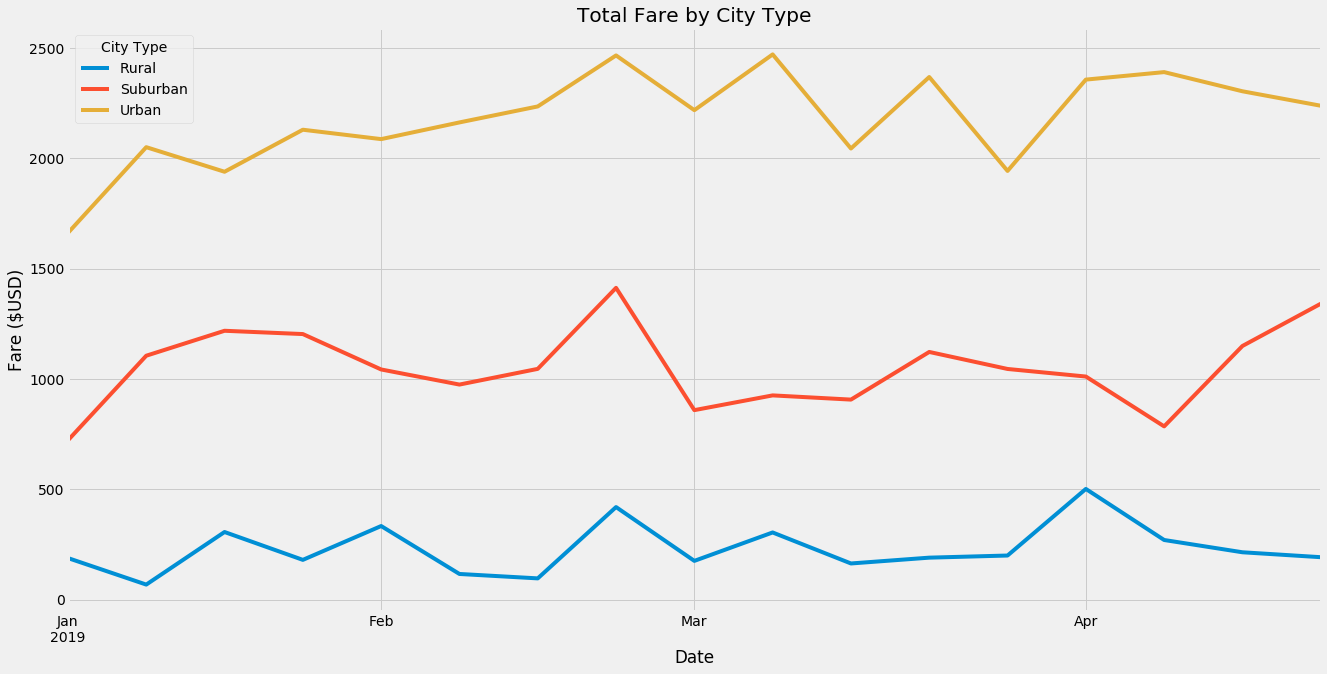

In [710]:
final_data.plot(figsize=(20,10))
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type')
plt.savefig('Analysis/ChallengeGraph.png')

In [623]:
# Get the number of rides for urban cities
urban_ride_count=urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [624]:
# Get the number of rides for suburban and rural cities
suburban_ride_count=suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count=rural_cities_df.groupby(['city']).count()['ride_id']

In [625]:
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [626]:
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [627]:
# Get average fare for each city in the urban cities
urban_avg_fare=urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [628]:
# Get average fare for each city in the suburban and rural cities
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']

In [629]:
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [630]:
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [631]:
# Get the average number of drivers for each urban city
urban_driver_count=urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [632]:
# Get the average number of frivers for each suburban and rural city
suburban_driver_count=suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count=rural_cities_df.groupby(['city']).mean()['driver_count']

In [633]:
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [634]:
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [635]:
# Get the total drivers
urban_driver_count.sum()

2405.0

In [636]:
suburban_driver_count.sum()

490.0

In [637]:
rural_driver_count.sum()

78.0

In [638]:
total_drivers = sum({2405,490,78})
total_drivers

2973

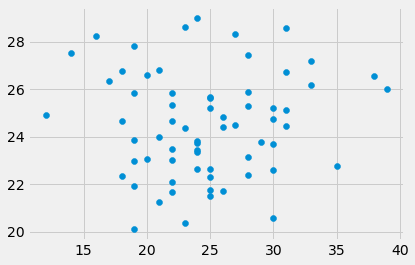

In [639]:
# Creating Bubble Charts
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count,urban_avg_fare)

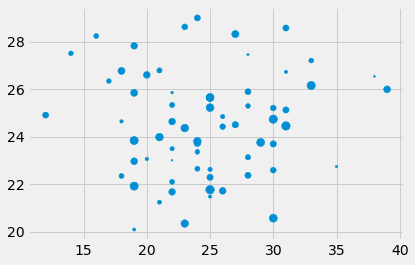

In [640]:
# Build the scatter plotsfor urban cities
plt.scatter(urban_ride_count,urban_avg_fare,s=urban_driver_count)

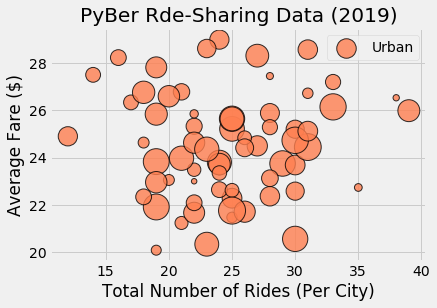

In [641]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare,s=10*urban_driver_count,c='coral',edgecolor='black',linewidths=1,alpha=0.8,label='Urban')
plt.title('PyBer Rde-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add the legend
plt.legend()

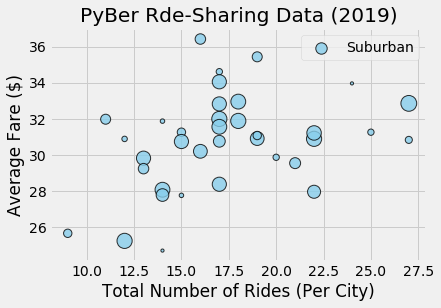

In [642]:
# Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare,s=10*suburban_driver_count,c='skyblue',edgecolor='black',linewidths=1,alpha=0.8,label='Suburban')
plt.title('PyBer Rde-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add the legend
plt.legend()

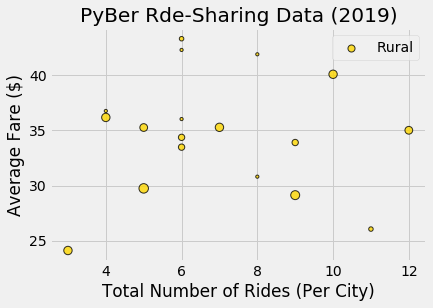

In [643]:
# Build the scatter plots for rural cities
plt.scatter(rural_ride_count, rural_avg_fare,s=10*rural_driver_count,c='gold',edgecolor='black',linewidths=1,alpha=0.8,label='Rural')
plt.title('PyBer Rde-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add the legend
plt.legend()

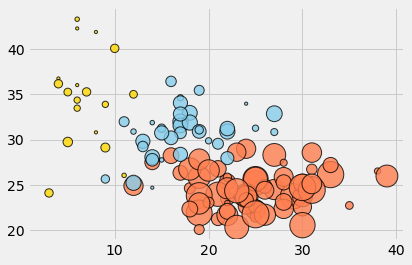

In [644]:
# Add the scatter charts for each type of city
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c='coral',edgecolor='black',linewidths=1,alpha=0.8,label='Urban')
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c='skyblue',edgecolor='black',linewidths=1,alpha=0.8,label='Suburban')
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,c='gold',edgecolor='black',linewidths=1,alpha=0.8,label='Rural')
# Show the Plot
plt.show()

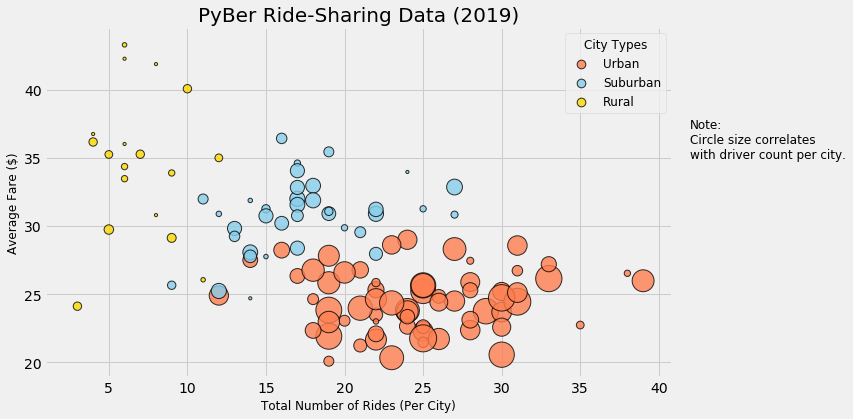

In [645]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c='coral',edgecolor='black',linewidths=1,alpha=0.8,label='Urban')
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c='skyblue',edgecolor='black',linewidths=1,alpha=0.8,label='Suburban')
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,c='gold',edgecolor='black',linewidths=1,alpha=0.8,label='Rural')
# Incorporate the other graph properties
plt.title('PyBer Ride-Sharing Data (2019)',fontsize=20)
plt.ylabel('Average Fare ($)',fontsize=12)
plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size
plt.text(42,35,'Note:\nCircle size correlates \nwith driver count per city.',fontsize='12')
# Save the figure
plt.savefig('Analysis/Fig1.png')
# Show the Plot
plt.show()

In [646]:
# Statistical Analysis on PyBer
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [647]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [648]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [649]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [650]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [651]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [652]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [653]:
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2),round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [654]:
# Calculate the mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [655]:
suburban_ride_count.mode()

0    17
dtype: int64

In [656]:
rural_ride_count.mode()

0    6
dtype: int64

In [657]:
# Get the sum of all the rides
urban_ride_count.sum()

1625

In [658]:
suburban_ride_count.sum()

625

In [659]:
rural_ride_count.sum()

125

In [660]:
total_rides = sum({1625,625,125})
total_rides

2375

In [661]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [662]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [663]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [664]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [665]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [666]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [667]:
suburban_fares = suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [668]:
rural_fares = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [669]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [670]:
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [671]:
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [672]:
# Calculate the measures of central tendency for the number of drivers in urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban cities is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban cities is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban cities is {mode_urban_drivers}.")

The mean number of drivers for urban cities is $36.68.
The median number of drivers for urban cities is $37.00.
The mode number of drivers for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [673]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban cities is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban cities is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban cities is {mode_suburban_drivers}.")

The mean number of drivers for suburban cities is $13.71.
The median number of drivers for suburban cities is $16.00.
The mode number of drivers for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [674]:
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural cities is ${mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural cities is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural cities is {mode_rural_drivers}.")

The mean number of drivers for rural cities is $4.30.
The median number of drivers for rural cities is $4.00.
The mode number of drivers for rural cities is ModeResult(mode=array([1]), count=array([32])).


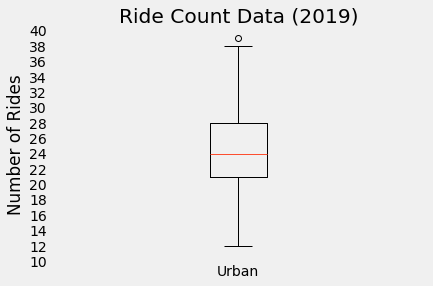

In [675]:
# Create a box and whiskey plot for the urban cities ride count
x_labels = ["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_ride_count,labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

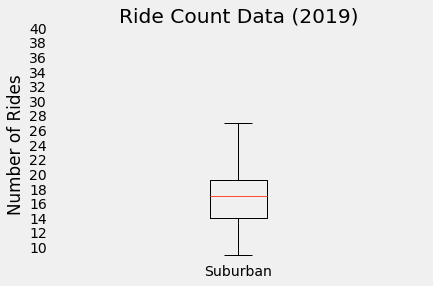

In [676]:
x_labels = ["Suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_ride_count,labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

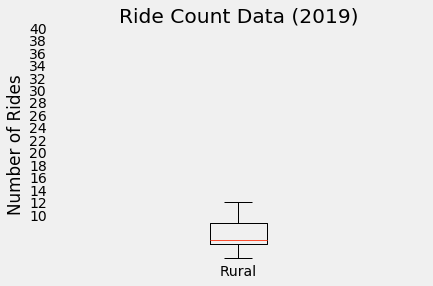

In [677]:
x_labels = ["Rural"]
fig,ax=plt.subplots()
ax.boxplot(rural_ride_count,labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

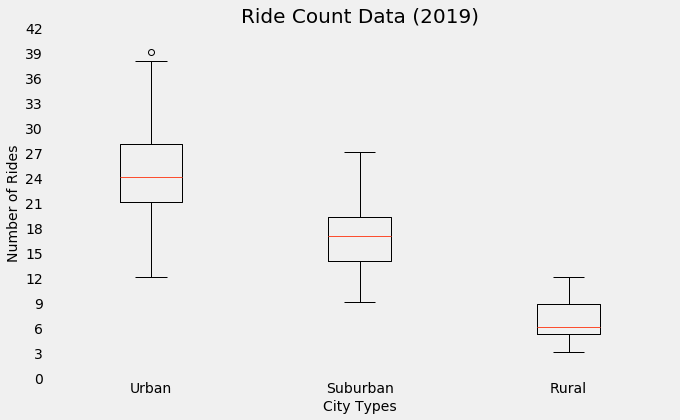

In [678]:
# Add all ride count box and whiskey plots to the same graph
x_labels=["Urban","Suburban","Rural"]
ride_count_data=[urban_ride_count,suburban_ride_count,rural_ride_count]
fig,ax=plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(ride_count_data,labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
# Save the figure
plt.savefig('Analysis/Box_and_Whisker.png')
plt.show()

In [679]:
# Get the city that matches 39
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


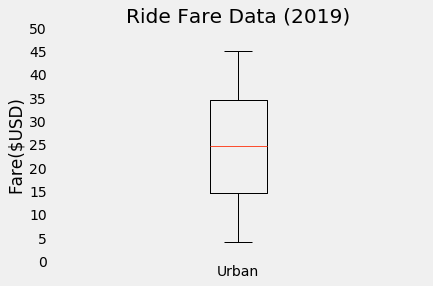

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [680]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

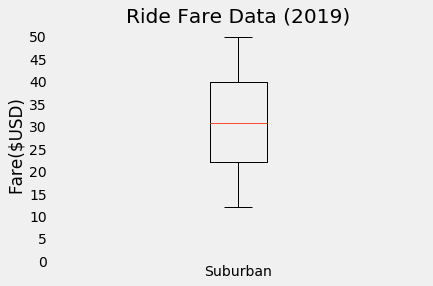

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [681]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

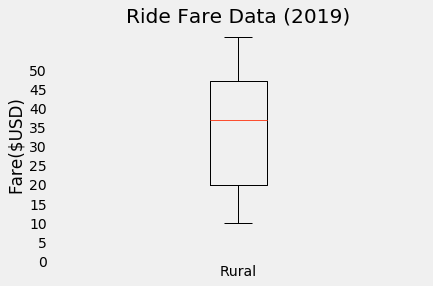

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [682]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

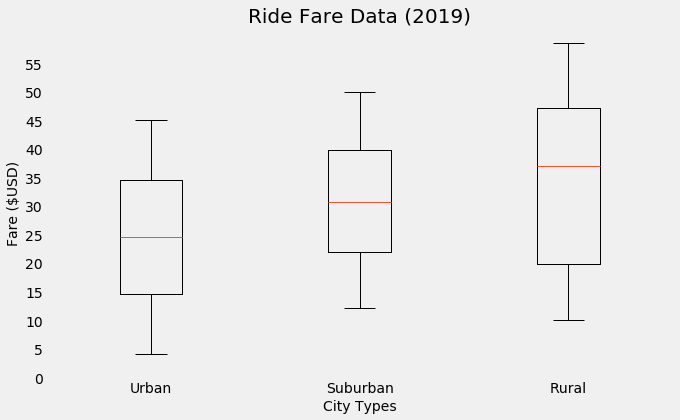

In [683]:
# Add all ride count box and whiskey plots to the same graph
x_labels=["Urban","Suburban","Rural"]
ride_fare_data=[urban_fares,suburban_fares,rural_fares]
fig,ax=plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(ride_fare_data,labels=x_labels)
ax.set_yticks(np.arange(0,56,step=5.0))
ax.grid()
# Save the figure
plt.savefig('Analysis/Box_and_WhiskerCombined.png')
plt.show()

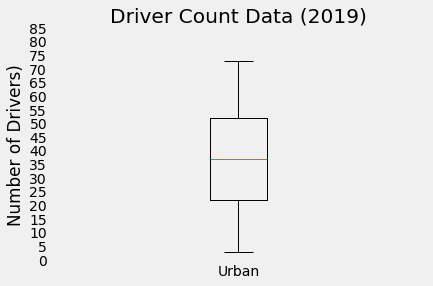

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [684]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

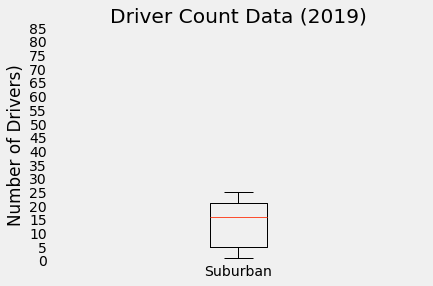

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [685]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

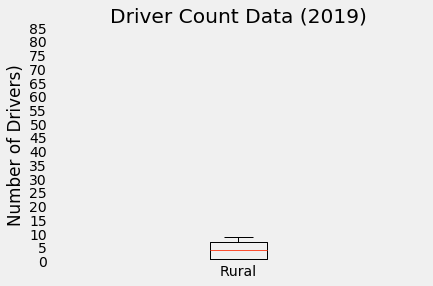

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [686]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

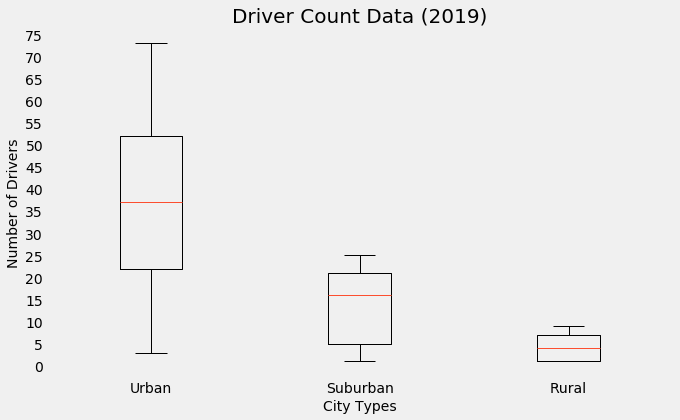

In [687]:
# Add all ride count box and whiskey plots to the same graph
x_labels=["Urban","Suburban","Rural"]
driver_count_data=[urban_drivers,suburban_drivers,rural_drivers]
fig,ax=plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(driver_count_data,labels=x_labels)
ax.set_yticks(np.arange(0,76,step=5.0))
ax.grid()
# Save the figure
plt.savefig('Analysis/Box_and_WhiskerCombined2.png')
plt.show()

In [688]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [689]:
# Get the sum of all the fares
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [690]:
# Calculate the percentage of fare for each city type
type_percents = 100*sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [691]:
# Calculating the percentage of fare for each city type
type_percents = 100*pyber_data_df.groupby(['type']).sum()['fare']/pyber_data_df['fare'].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

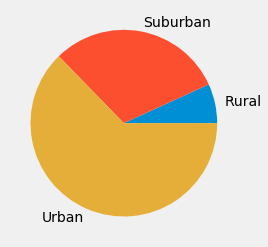

In [692]:
# Build the percentage of fares by city type pie chart
plt.pie(type_percents,labels=['Rural','Suburban','Urban'])
plt.show()

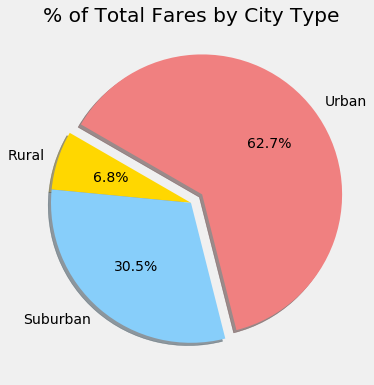

In [693]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10,6))
# Build the percentage of fares by city type pie chart
plt.pie(type_percents,labels=['Rural','Suburban','Urban'], colors=['gold','lightskyblue','lightcoral'],explode=[0,0,0.1],autopct='%1.1f%%',shadow=True,startangle=150)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('Analysis/PieChartPyBer.png')
# Show Figure
plt.show()

In [694]:
# Calculate Ride Percentages in Pie Chart
pyber_data_df.groupby(['type'])

In [695]:
pyber_data_df.groupby(['type']).count()['ride_id']

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [696]:
# Calculate the percentage of rides for each city type
ride_percents = 100*pyber_data_df.groupby(['type']).count()['ride_id']/pyber_data_df['ride_id'].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

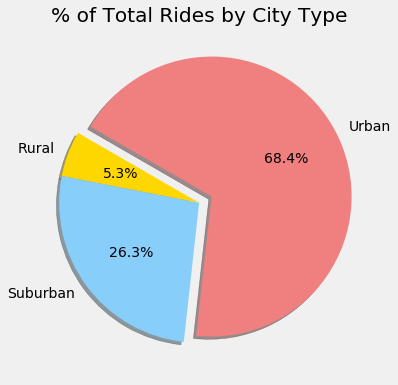

In [697]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [698]:
# Calculate Driver Percentages for Pie Chart
# Calculate the percentage of drivers for each city type
driver_percents = 100*city_data_df.groupby(['type']).sum()['driver_count']/city_data_df['driver_count'].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

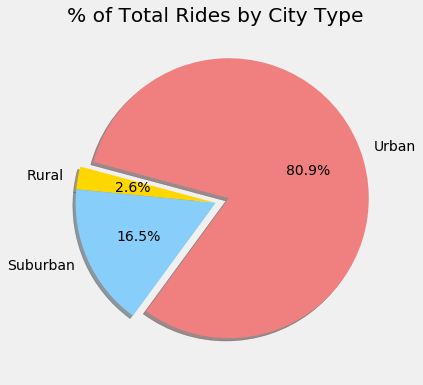

In [699]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()